# Data Analysis and Interpretation

### Show all files from Original Scenario

In [7]:
import os

path = '/home/tassia/TCC code/Treatment-of-incomplete-kernels/Original/drug_response_data/'
files = os.listdir(path)
files

['F1_score.txt',
 'Cell_line_IDs.txt',
 'Folds',
 'Pearson_correlation.txt',
 'pairwise_kernel_names.txt',
 'Drug_kernels',
 'Labels.txt',
 'Cell_line_kernels',
 'selected_lambda.txt',
 'pairwise_kernel_weights.txt',
 'Drug_PubChem_IDs.txt',
 'RMSE.txt',
 '.DS_Store',
 'y_pred_vec.txt']

In [8]:
import numpy as np
import pandas as pd

data = {}
data['F1'] = []
data['Pearson_Correlation'] = []
data['RMSE'] = []
data['pesos'] = []
data['kernel_names'] = []

mean_f1 = []
mean_pearsonCorrelation = []
mean_RMSE = []
weights = []

f1_file = '/home/tassia/TCC code/Treatment-of-incomplete-kernels/Original/drug_response_data/F1_score.txt'
f1 = np.loadtxt(f1_file)
mean_f1.append(f1.mean())


pearsonCorrelation_file = '/home/tassia/TCC code/Treatment-of-incomplete-kernels/Original/drug_response_data/Pearson_correlation.txt'
pearsonCorrelation = np.loadtxt(pearsonCorrelation_file)
mean_pearsonCorrelation.append(pearsonCorrelation.mean())


RMSE_file = '/home/tassia/TCC code/Treatment-of-incomplete-kernels/Original/drug_response_data/RMSE.txt'
RMSE = np.loadtxt(RMSE_file)
mean_RMSE.append(RMSE.mean())


pesos = np.loadtxt('/home/tassia/TCC code/Treatment-of-incomplete-kernels/Original/drug_response_data/pairwise_kernel_weights.txt').mean(axis=0)
weights.append(pesos)


kernel_names = open('/home/tassia/TCC code/Treatment-of-incomplete-kernels/Original/drug_response_data/pairwise_kernel_names.txt','r').read().split('\t')


data['F1'].append(np.mean(mean_f1))
data['Pearson_Correlation'].append(np.mean(mean_pearsonCorrelation))
data['RMSE'].append(np.mean(mean_RMSE))
data['pesos'].append(np.mean(weights, axis=0))
data['kernel_names'].append(kernel_names)


df_original = pd.DataFrame(data=data)
df_original

,F1,Pearson_Correlation,RMSE,pesos,kernel_names
0,0.636589,0.837781,1.799855,"[5.601325879401939e-10, -1.251544010525118e-10...","[Kd_PubChem.txt_KRONECKER_Kc_cn_146.txt, Kd_Pu..."


### Show all files from Scenario_Modified

In [9]:
import os

path = '../Scenario_Modified/data_base/Scenario-03/'
dirs = os.listdir(path)
dirs

['Scenario-03_average_70',
 'Scenario-03_zero_10',
 'Scenario-03_median_70',
 'Scenario-03_average_30',
 'Scenario-03_median_10',
 'Scenario-03_SVD_30',
 'Scenario-03_average_10',
 'Scenario-03_SVD_70',
 'Scenario-03_median_30',
 'Scenario-03_median_50',
 'Scenario-03_SVD_50',
 'Scenario-03_zero_50',
 'Scenario-03_SVD_10',
 'Scenario-03_zero_70',
 'Scenario-03_zero_30',
 'Scenario-03_average_50']

In [10]:
import numpy as np
import pandas as pd

data = {}
data['tipo'] = []
data['percentual'] = []
data['F1'] = []
data['Pearson_Correlation'] = []
data['RMSE'] = []
data['pesos'] = []
data['kernel_names'] = []

for dir in dirs:
    # print('DIR', dir)
    mean_f1 = []
    mean_pearsonCorrelation = []
    mean_RMSE = []
    weights = []
    for iter in os.listdir(path+dir):
        # print('ITER', iter)
        f1_file = path+dir+'/'+iter+'/F1_score.txt'
        f1 = np.loadtxt(f1_file)
        mean_f1.append(f1.mean())

        pearsonCorrelation_file = path+dir+'/'+iter+'/Pearson_correlation.txt'
        pearsonCorrelation = np.loadtxt(pearsonCorrelation_file)
        mean_pearsonCorrelation.append(pearsonCorrelation.mean())

        RMSE_file = path+dir+'/'+iter+'/RMSE.txt'
        RMSE = np.loadtxt(RMSE_file)
        mean_RMSE.append(RMSE.mean())

        pesos        = np.loadtxt(path+dir+'/'+iter+'/pairwise_kernel_weights.txt').mean(axis=0)
        weights.append(pesos)
        kernel_names = open(path+dir+'/'+iter+'/pairwise_kernel_names.txt','r').read().split('\t')
        partes = dir.split('_')

    data['tipo'].append(partes[1])
    data['percentual'].append(int(partes[2]))
    data['F1'].append(np.mean(mean_f1))
    data['Pearson_Correlation'].append(np.mean(mean_pearsonCorrelation))
    data['RMSE'].append(np.mean(mean_RMSE))
    data['pesos'].append(np.mean(weights, axis=0))
    data['kernel_names'].append(kernel_names)


df = pd.DataFrame(data=data)
df

,tipo,percentual,F1,Pearson_Correlation,RMSE,pesos,kernel_names
0,average,70,0.579875,0.749258,2.305535,"[1.9133301043404116e-09, 1.1860220459384222e-0...",[Modified_average_70_Kd_PubChem.txt_KRONECKER_...
1,zero,10,0.550972,0.715022,2.503264,"[-2.1805978156574324e-09, 8.223579908914936e-0...",[Modified_zero_10_Kd_PubChem.txt_KRONECKER_Mod...
2,median,70,0.588694,0.764835,2.221370,"[2.8710243880506185e-10, 1.2581962717059267e-0...",[Modified_median_70_Kd_PubChem.txt_KRONECKER_M...
3,average,30,0.593713,0.769131,2.207264,"[1.1090985110776788e-09, 6.566769476237578e-09...",[Modified_average_30_Kd_PubChem.txt_KRONECKER_...
4,median,10,0.603812,0.790405,2.085613,"[-6.607625168993367e-10, -6.423626386361722e-1...",[Modified_median_10_Kd_PubChem.txt_KRONECKER_M...
5,SVD,30,0.632627,0.843531,1.761056,"[8.272302394742943e-09, 1.1858227237629868e-08...",[na_30_Kd_circular.txt_KRONECKER_na_30_Kc_cn_1...
6,average,10,0.599449,0.781158,2.134961,"[-6.119697960117947e-10, -6.773923628645899e-1...",[Modified_average_10_Kd_PubChem.txt_KRONECKER_...
7,SVD,70,0.622697,0.829277,1.835260,"[5.300313818108024e-09, 4.994236260947738e-09,...",[na_70_Kd_circular.txt_KRONECKER_na_70_Kc_cn_1...
8,median,30,0.593312,0.769816,2.199635,"[1.5806334247935368e-09, 2.98531875004523e-09,...",[Modified_median_30_Kd_PubChem.txt_KRONECKER_M...
9,median,50,0.581394,0.757179,2.270431,"[3.916667648008931e-09, 1.9683407501925052e-08...",[Modified_median_50_Kd_PubChem.txt_KRONECKER_M...


### Analysis grouped by percent: 10%

In [13]:
df_10 = df[df['percentual'] == 10]
df_10

,tipo,percentual,F1,Pearson_Correlation,RMSE,pesos,kernel_names
1,zero,10,0.550972,0.715022,2.503264,"[-2.1805978156574324e-09, 8.223579908914936e-0...",[Modified_zero_10_Kd_PubChem.txt_KRONECKER_Mod...
4,median,10,0.603812,0.790405,2.085613,"[-6.607625168993367e-10, -6.423626386361722e-1...",[Modified_median_10_Kd_PubChem.txt_KRONECKER_M...
6,average,10,0.599449,0.781158,2.134961,"[-6.119697960117947e-10, -6.773923628645899e-1...",[Modified_average_10_Kd_PubChem.txt_KRONECKER_...
12,SVD,10,0.638894,0.849542,1.728124,"[5.006588277521835e-09, 8.615463508015846e-10,...",[na_10_Kd_circular.txt_KRONECKER_na_10_Kc_cn_1...


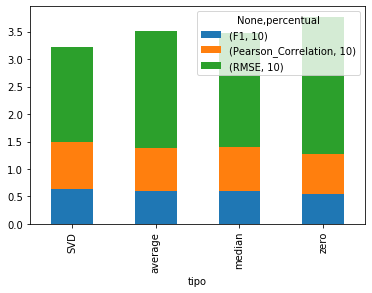

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

df_10.groupby(['tipo','percentual']).mean().unstack().plot(kind='bar',stacked=True)
plt.show()

### Analysis grouped by percent: 30%

In [15]:
df_30 = df[df['percentual'] == 30]
df_30

,tipo,percentual,F1,Pearson_Correlation,RMSE,pesos,kernel_names
3,average,30,0.593713,0.769131,2.207264,"[1.1090985110776788e-09, 6.566769476237578e-09...",[Modified_average_30_Kd_PubChem.txt_KRONECKER_...
5,SVD,30,0.632627,0.843531,1.761056,"[8.272302394742943e-09, 1.1858227237629868e-08...",[na_30_Kd_circular.txt_KRONECKER_na_30_Kc_cn_1...
8,median,30,0.593312,0.769816,2.199635,"[1.5806334247935368e-09, 2.98531875004523e-09,...",[Modified_median_30_Kd_PubChem.txt_KRONECKER_M...
14,zero,30,0.530130,0.639928,3.008988,"[4.628116774265994e-08, 0.0007348337924921399,...",[Modified_zero_30_Kd_PubChem.txt_KRONECKER_Mod...


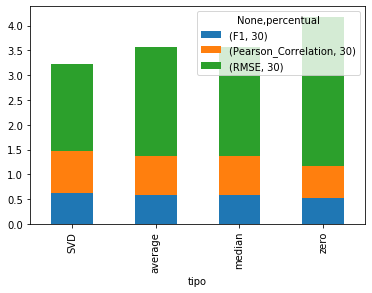

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

df_30.groupby(['tipo','percentual']).mean().unstack().plot(kind='bar',stacked=True)
plt.show()

### Analysis grouped by percent: 50%

In [17]:
df_50 = df[df['percentual'] == 50]
df_50

,tipo,percentual,F1,Pearson_Correlation,RMSE,pesos,kernel_names
9,median,50,0.581394,0.757179,2.270431,"[3.916667648008931e-09, 1.9683407501925052e-08...",[Modified_median_50_Kd_PubChem.txt_KRONECKER_M...
10,SVD,50,0.631839,0.842146,1.769380,"[3.028503687193813e-10, -1.25939399747798e-09,...",[na_50_Kd_circular.txt_KRONECKER_na_50_Kc_cn_1...
11,zero,50,0.499740,0.565537,3.558117,"[0.0009840937354764368, 0.0035398225503769534,...",[Modified_zero_50_Kd_PubChem.txt_KRONECKER_Mod...
15,average,50,0.592168,0.761037,2.250131,"[-3.3476193892258877e-10, 7.044754901268078e-0...",[Modified_average_50_Kd_PubChem.txt_KRONECKER_...


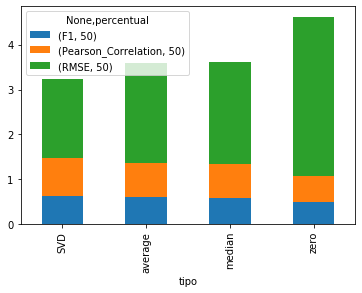

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

df_50.groupby(['tipo','percentual']).mean().unstack().plot(kind='bar',stacked=True)
plt.show()

### Analysis grouped by percent: 70%

In [19]:
df_70 = df[df['percentual'] == 70]
df_70

,tipo,percentual,F1,Pearson_Correlation,RMSE,pesos,kernel_names
0,average,70,0.579875,0.749258,2.305535,"[1.9133301043404116e-09, 1.1860220459384222e-0...",[Modified_average_70_Kd_PubChem.txt_KRONECKER_...
2,median,70,0.588694,0.764835,2.221370,"[2.8710243880506185e-10, 1.2581962717059267e-0...",[Modified_median_70_Kd_PubChem.txt_KRONECKER_M...
7,SVD,70,0.622697,0.829277,1.835260,"[5.300313818108024e-09, 4.994236260947738e-09,...",[na_70_Kd_circular.txt_KRONECKER_na_70_Kc_cn_1...
13,zero,70,0.478331,0.463281,4.609841,"[1.517349778407336e-07, 0.0013806195640030546,...",[Modified_zero_70_Kd_PubChem.txt_KRONECKER_Mod...


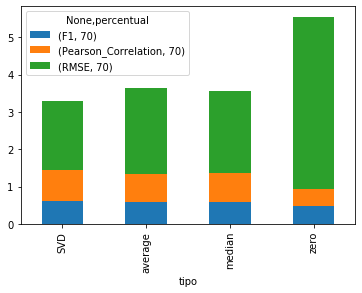

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

df_70.groupby(['tipo','percentual']).mean().unstack().plot(kind='bar',stacked=True)
plt.show()

### Evaluation of the performance of the techniques in comparison with the F1 score

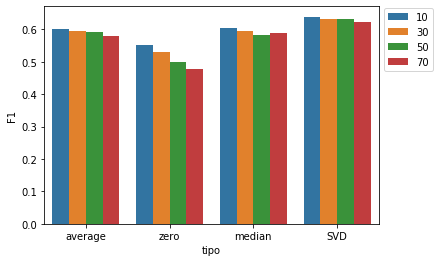

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

#mudei aqui
graph_F1_tipo = sns.barplot(x='tipo', y='F1', data=df, hue='percentual')
# graph_F1_tipo.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)

# Put the legend out of the figure
graph_F1_tipo.legend(bbox_to_anchor=(1.01, 1.0), loc=2, borderaxespad=0.2)

fig_performe_F1_by_technique = plt.gcf()
plt.show()
fig_performe_F1_by_technique.savefig('performe_F1_by_techniqueTESTE.png', format='png')

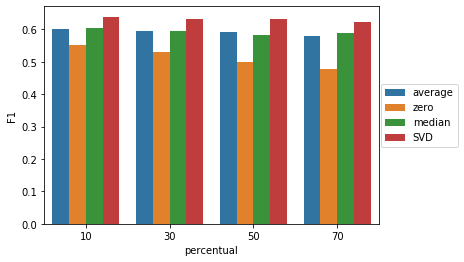

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

#mudei aqui
graph_F1_percent = sns.barplot(x='percentual', y='F1', data=df, hue='tipo')
graph_F1_percent.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)

fig_performe_F1_by_percent = plt.gcf()
plt.show()
fig_performe_F1_by_percent.savefig('performe_F1_by_percent.png', format='png')

### Evaluation of the performance of the techniques in comparison with the Pearson Correlation


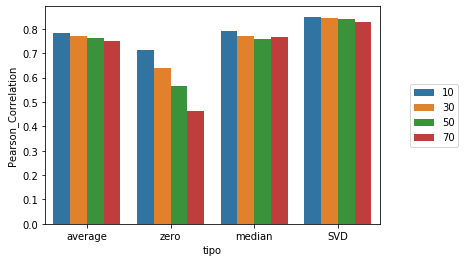

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

graph_PC_tipo = sns.barplot(x='tipo', y='Pearson_Correlation', data=df, hue='percentual')
graph_PC_tipo.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)

fig_performe_PC_by_technique = plt.gcf()
plt.show()
fig_performe_PC_by_technique.savefig('performe_PC_by_technique.png', format='png')

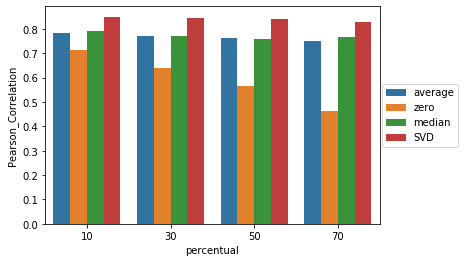

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

graph_PC_percent = sns.barplot(x='percentual', y='Pearson_Correlation', data=df, hue='tipo')
graph_PC_percent.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)

fig_performe_PC_by_percentual = plt.gcf()
plt.show()
fig_performe_PC_by_percentual.savefig('performe_PC_by_percentual.png', format='png')

### Evaluation of the performance of the techniques in comparison with the RMSE

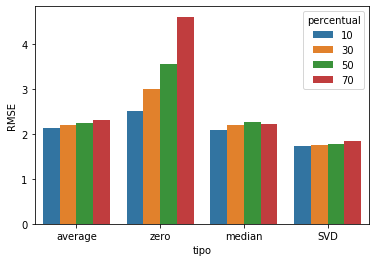

In [25]:
sns.barplot(x='tipo', y='RMSE', data=df, hue='percentual')
fig_performe_RSME_by_technique = plt.gcf()
plt.show()
fig_performe_RSME_by_technique.savefig('performe_RSME_by_technique.png', format='png')

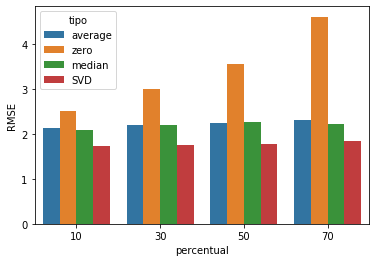

In [26]:
sns.barplot(x='percentual', y='RMSE', data=df, hue='tipo')
fig_performe_RSME_by_percentual = plt.gcf()
plt.show()
fig_performe_RSME_by_percentual.savefig('performe_RSME_by_percentual.png', format='png')

### Analysis of weights according to the combination of drug and protein files. Evaluated with: technique: SVD; percentage: 10.

In [101]:
def plot_heatmap(dataframe, percentual=10, tipo='SVD'):

    # testando com 30% e tipo=zero
    pesos = dataframe[(dataframe['percentual'] == percentual) \
                    & (dataframe['tipo'] == tipo)]['pesos'].values[0]
    kernel_names = dataframe[(dataframe['percentual'] == percentual) \
                           & (dataframe['tipo'] == tipo)]['kernel_names'].values[0]
    # assumindo que kernel_names nao muda em cada execucao
    kds = [kn.split('.txt')[0] for kn in kernel_names[:-1]]
    kcs = [kn.split('.txt')[1] for kn in kernel_names[:-1]]
    pesos = dataframe[(dataframe['percentual'] == 10) \
                    & (dataframe['tipo'] == 'SVD')]['pesos'].values[0]

    df2 = pd.DataFrame(data={
        'kd': kds,
        'kc': kcs,
        'peso': pesos} )

    matrix = df2.groupby(['kd','kc'])['peso'].mean().unstack()

    # sns.heatmap(matrix)
    weight_svd_10 = sns.heatmap(matrix, cmap="YlGnBu", cbar=True, annot=False)
    # sem legenda:
    # weight_svd_10 = sns.heatmap(matrix, cmap="YlGnBu", xticklabels=False, yticklabels=False)

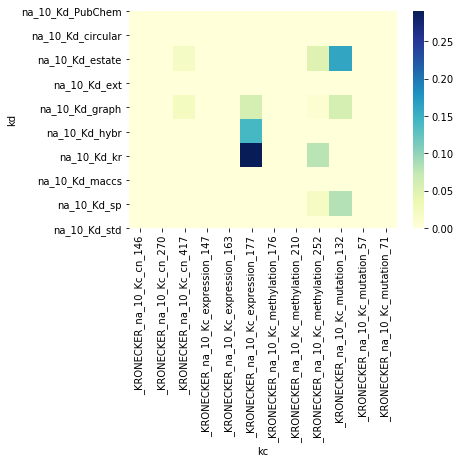

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

plot_heatmap(df, percentual=10, tipo='SVD')

weight_svd_10 = plt.gcf()
plt.title("Enter your title", fontsize =20)
plt.show()
weight_svd_10.savefig('weight_svd_10_title.png', format='png')

### Analysis of weights according to the combination of drug and protein files. Evaluated with: technique: SVD; percentage: 30.

In [29]:
def plot_heatmap(dataframe, percentual=30, tipo='SVD'):

    # testando com 30% e tipo=zero
    pesos = dataframe[(dataframe['percentual'] == percentual) \
                    & (dataframe['tipo'] == tipo)]['pesos'].values[0]
    kernel_names = dataframe[(dataframe['percentual'] == percentual) \
                           & (dataframe['tipo'] == tipo)]['kernel_names'].values[0]
    # assumindo que kernel_names nao muda em cada execucao
    kds = [kn.split('.txt')[0] for kn in kernel_names[:-1]]
    kcs = [kn.split('.txt')[1] for kn in kernel_names[:-1]]
    pesos = dataframe[(dataframe['percentual'] == 30) \
                    & (dataframe['tipo'] == 'SVD')]['pesos'].values[0]

    df2 = pd.DataFrame(data={
        'kd': kds,
        'kc': kcs,
        'peso': pesos} )

    matrix = df2.groupby(['kd','kc'])['peso'].mean().unstack()

    # sns.heatmap(matrix)
    weight_svd_30 = sns.heatmap(matrix, cmap="YlGnBu")

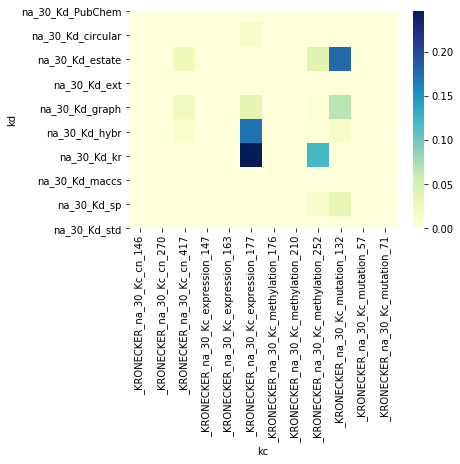

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plot_heatmap(df, percentual=30, tipo='SVD')

weight_svd_30 = plt.gcf()
plt.show()
weight_svd_30.savefig('weight_svd_30.png', format='png')

### Analysis of weights according to the combination of drug and protein files. Evaluated with: technique: SVD; percentage: 50.

In [31]:
def plot_heatmap(dataframe, percentual=50, tipo='SVD'):

    # testando com 30% e tipo=zero
    pesos = dataframe[(dataframe['percentual'] == percentual) \
                    & (dataframe['tipo'] == tipo)]['pesos'].values[0]
    kernel_names = dataframe[(dataframe['percentual'] == percentual) \
                           & (dataframe['tipo'] == tipo)]['kernel_names'].values[0]
    # assumindo que kernel_names nao muda em cada execucao
    kds = [kn.split('.txt')[0] for kn in kernel_names[:-1]]
    kcs = [kn.split('.txt')[1] for kn in kernel_names[:-1]]
    pesos = dataframe[(dataframe['percentual'] == 50) \
                    & (dataframe['tipo'] == 'SVD')]['pesos'].values[0]

    df2 = pd.DataFrame(data={
        'kd': kds,
        'kc': kcs,
        'peso': pesos} )

    matrix = df2.groupby(['kd','kc'])['peso'].mean().unstack()

    # sns.heatmap(matrix)
    weight_svd_50 = sns.heatmap(matrix, cmap="YlGnBu")

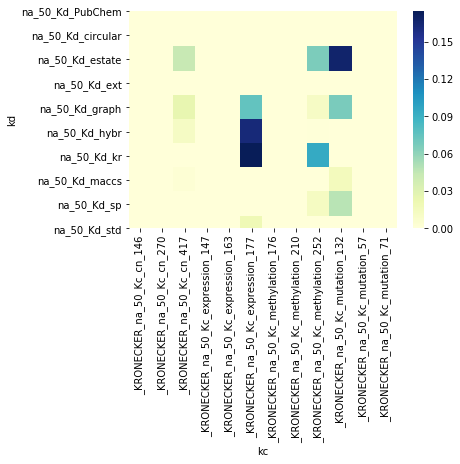

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plot_heatmap(df, percentual=50, tipo='SVD')

weight_svd_50 = plt.gcf()
plt.show()
weight_svd_50.savefig('weight_svd_50.png', format='png')

### Analysis of weights according to the combination of drug and protein files. Evaluated with: technique: SVD; percentage: 70.

In [78]:
def plot_heatmap(dataframe, percentual=70, tipo='SVD'):

    # testando com 30% e tipo=zero
    pesos = dataframe[(dataframe['percentual'] == percentual) \
                    & (dataframe['tipo'] == tipo)]['pesos'].values[0]
    kernel_names = dataframe[(dataframe['percentual'] == percentual) \
                           & (dataframe['tipo'] == tipo)]['kernel_names'].values[0]
    # assumindo que kernel_names nao muda em cada execucao
    kds = [kn.split('.txt')[0] for kn in kernel_names[:-1]]
    kcs = [kn.split('.txt')[1] for kn in kernel_names[:-1]]
    pesos = dataframe[(dataframe['percentual'] == 70) \
                    & (dataframe['tipo'] == 'SVD')]['pesos'].values[0]

    df2 = pd.DataFrame(data={
        'kd': kds,
        'kc': kcs,
        'peso': pesos} )

    matrix = df2.groupby(['kd','kc'])['peso'].mean().unstack()

    # sns.heatmap(matrix)
    weight_svd_70 = sns.heatmap(matrix, cmap="YlGnBu")

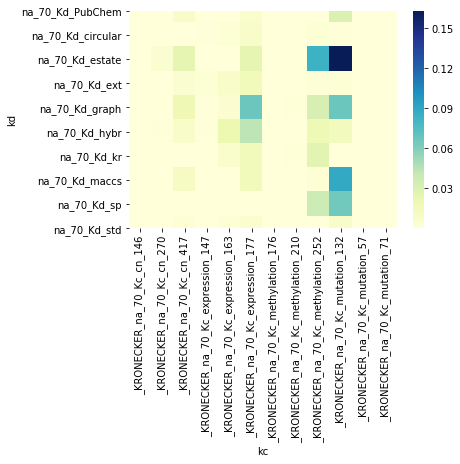

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

plot_heatmap(df, percentual=70, tipo='SVD')

weight_svd_70 = plt.gcf()
plt.show()
weight_svd_70.savefig('weight_svd_70.png', format='png')

### Analysis of weights according to the combination of drug and protein files. Evaluated with: technique: zero; percentage: 10.

In [35]:
import numpy as np
import seaborn as sns

def plot_heatmap(dataframe, percentual=10, tipo='zero'):

    # testando com 10% e tipo=zero
    pesos = dataframe[(dataframe['percentual'] == percentual) \
                    & (dataframe['tipo'] == tipo)]['pesos'].values[0]
    kernel_names = dataframe[(dataframe['percentual'] == percentual) \
                           & (dataframe['tipo'] == tipo)]['kernel_names'].values[0]
    # assumindo que kernel_names nao muda em cada execucao
    kds = [kn.split('.txt')[0] for kn in kernel_names[:-1]]
    kcs = [kn.split('.txt')[1] for kn in kernel_names[:-1]]
    pesos = dataframe[(dataframe['percentual'] == 10) \
                    & (dataframe['tipo'] == 'zero')]['pesos'].values[0]

    df2 = pd.DataFrame(data={
        'kd': kds,
        'kc': kcs,
        'peso': pesos} )

    matrix = df2.groupby(['kd','kc'])['peso'].mean().unstack()

    weight_zero_10 = sns.heatmap(matrix, cmap="YlGnBu")



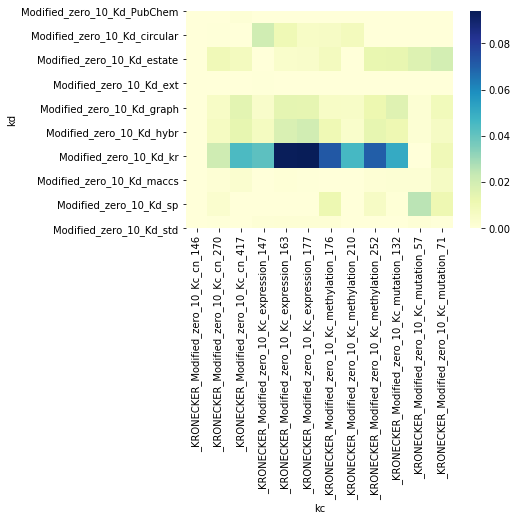

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plot_heatmap(df, percentual=10, tipo='zero')

weight_zero_10 = plt.gcf()
plt.show()
weight_zero_10.savefig('weight_zero_10.png', format='png')

### Analysis of weights according to the combination of drug and protein files. Evaluated with: technique: zero; percentage: 30.


In [37]:
def plot_heatmap(dataframe, percentual=30, tipo='zero'):

    # testando com 30% e tipo=zero
    pesos = dataframe[(dataframe['percentual'] == percentual) \
                    & (dataframe['tipo'] == tipo)]['pesos'].values[0]
    kernel_names = dataframe[(dataframe['percentual'] == percentual) \
                           & (dataframe['tipo'] == tipo)]['kernel_names'].values[0]
    # assumindo que kernel_names nao muda em cada execucao
    kds = [kn.split('.txt')[0] for kn in kernel_names[:-1]]
    kcs = [kn.split('.txt')[1] for kn in kernel_names[:-1]]
    pesos = dataframe[(dataframe['percentual'] == 30) \
                    & (dataframe['tipo'] == 'zero')]['pesos'].values[0]

    df2 = pd.DataFrame(data={
        'kd': kds,
        'kc': kcs,
        'peso': pesos} )

    matrix = df2.groupby(['kd','kc'])['peso'].mean().unstack()

    # sns.heatmap(matrix)
    weight_zero_30 = sns.heatmap(matrix, cmap="YlGnBu")

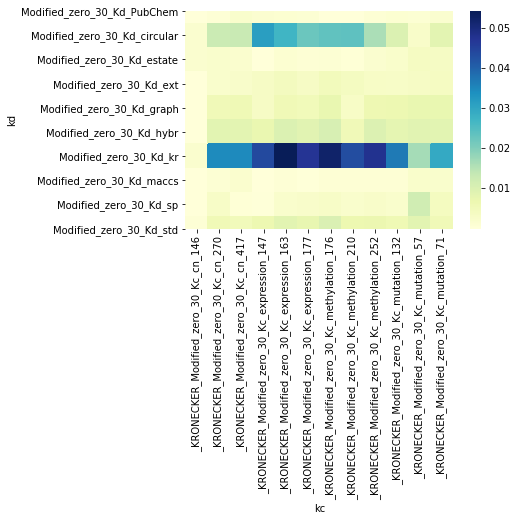

In [38]:
plot_heatmap(df, percentual=30, tipo='zero')

weight_zero_30 = plt.gcf()
plt.show()
weight_zero_30.savefig('weight_zero_30.png', format='png')

### Analysis of weights according to the combination of drug and protein files. Evaluated with: technique: zero; percentage: 50.

In [39]:
def plot_heatmap(dataframe, percentual=50, tipo='zero'):

    # testando com 50% e tipo=zero
    pesos = dataframe[(dataframe['percentual'] == percentual) \
                    & (dataframe['tipo'] == tipo)]['pesos'].values[0]
    kernel_names = dataframe[(dataframe['percentual'] == percentual) \
                           & (dataframe['tipo'] == tipo)]['kernel_names'].values[0]
    # assumindo que kernel_names nao muda em cada execucao
    kds = [kn.split('.txt')[0] for kn in kernel_names[:-1]]
    kcs = [kn.split('.txt')[1] for kn in kernel_names[:-1]]
    pesos = dataframe[(dataframe['percentual'] == 50) \
                    & (dataframe['tipo'] == 'zero')]['pesos'].values[0]

    df2 = pd.DataFrame(data={
        'kd': kds,
        'kc': kcs,
        'peso': pesos} )

    matrix = df2.groupby(['kd','kc'])['peso'].mean().unstack()

    # sns.heatmap(matrix)
    weight_zero_50 = sns.heatmap(matrix, cmap="YlGnBu")

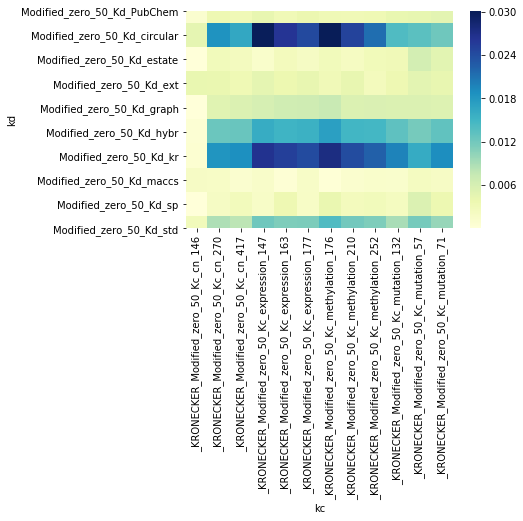

In [40]:
plot_heatmap(df, percentual=50, tipo='zero')

weight_zero_50 = plt.gcf()
plt.show()
weight_zero_50.savefig('weight_zero_50.png', format='png')

### Analysis of weights according to the combination of drug and protein files. Evaluated with: technique: zero; percentage: 70.

In [47]:
def plot_heatmap(dataframe, percentual=70, tipo='zero'):

    # testando com 70% e tipo=zero
    pesos = dataframe[(dataframe['percentual'] == percentual) \
                    & (dataframe['tipo'] == tipo)]['pesos'].values[0]
    kernel_names = dataframe[(dataframe['percentual'] == percentual) \
                           & (dataframe['tipo'] == tipo)]['kernel_names'].values[0]
    # assumindo que kernel_names nao muda em cada execucao
    kds = [kn.split('.txt')[0] for kn in kernel_names[:-1]]
    kcs = [kn.split('.txt')[1] for kn in kernel_names[:-1]]
    pesos = dataframe[(dataframe['percentual'] == 70) \
                    & (dataframe['tipo'] == 'zero')]['pesos'].values[0]

    df2 = pd.DataFrame(data={
        'kd': kds,
        'kc': kcs,
        'peso': pesos} )

    matrix = df2.groupby(['kd','kc'])['peso'].mean().unstack()

    # sns.heatmap(matrix)
    weight_zero_70 = sns.heatmap(matrix, cmap="YlGnBu")

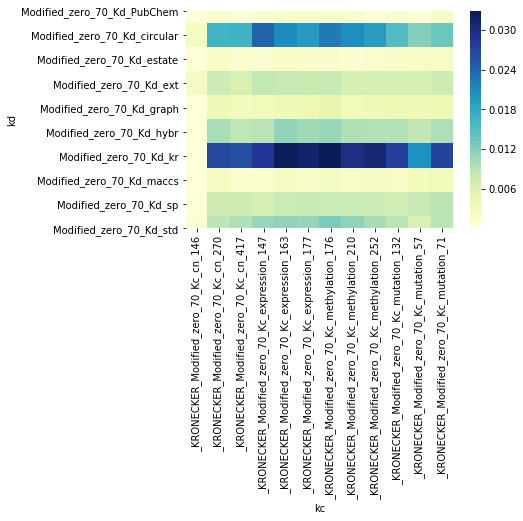

In [48]:
plot_heatmap(df, percentual=70, tipo='zero')

weight_zero_70 = plt.gcf()
plt.show()
weight_zero_70.savefig('weight_zero_70.png', format='png')

### Analysis of weights according to the combination of drug and protein files. Evaluated with: technique: average; percentage: 10.

In [76]:
def plot_heatmap(dataframe, percentual=10, tipo='average'):

    # testando com 10% e tipo=average
    pesos = dataframe[(dataframe['percentual'] == percentual) \
                    & (dataframe['tipo'] == tipo)]['pesos'].values[0]
    kernel_names = dataframe[(dataframe['percentual'] == percentual) \
                           & (dataframe['tipo'] == tipo)]['kernel_names'].values[0]
    # assumindo que kernel_names nao muda em cada execucao
    kds = [kn.split('.txt')[0] for kn in kernel_names[:-1]]
    kcs = [kn.split('.txt')[1] for kn in kernel_names[:-1]]
    pesos = dataframe[(dataframe['percentual'] == 10) \
                    & (dataframe['tipo'] == 'average')]['pesos'].values[0]

    df2 = pd.DataFrame(data={
        'kd': kds,
        'kc': kcs,
        'peso': pesos} )

    matrix = df2.groupby(['kd','kc'])['peso'].mean().unstack()

    # sns.heatmap(matrix)
    weight_average_10 = sns.heatmap(matrix, cmap="YlGnBu")

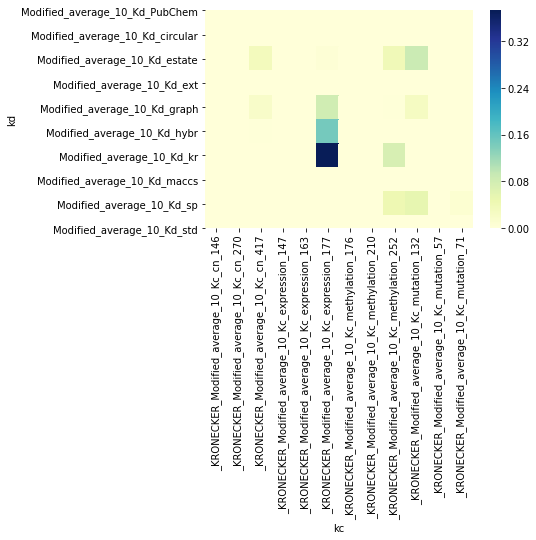

In [77]:
plot_heatmap(df, percentual=10, tipo='average')

weight_average_10 = plt.gcf()
plt.show()
weight_average_10.savefig('weight_average_10.png', format='png')

### Analysis of weights according to the combination of drug and protein files. Evaluated with: technique: average; percentage: 30.

In [74]:
def plot_heatmap(dataframe, percentual=30, tipo='average'):

    # testando com 30% e tipo=average
    pesos = dataframe[(dataframe['percentual'] == percentual) \
                    & (dataframe['tipo'] == tipo)]['pesos'].values[0]
    kernel_names = dataframe[(dataframe['percentual'] == percentual) \
                           & (dataframe['tipo'] == tipo)]['kernel_names'].values[0]
    # assumindo que kernel_names nao muda em cada execucao
    kds = [kn.split('.txt')[0] for kn in kernel_names[:-1]]
    kcs = [kn.split('.txt')[1] for kn in kernel_names[:-1]]
    pesos = dataframe[(dataframe['percentual'] == 30) \
                    & (dataframe['tipo'] == 'average')]['pesos'].values[0]

    df2 = pd.DataFrame(data={
        'kd': kds,
        'kc': kcs,
        'peso': pesos} )

    matrix = df2.groupby(['kd','kc'])['peso'].mean().unstack()

     # sns.heatmap(matrix)
    weight_average_30 = sns.heatmap(matrix, cmap="YlGnBu")

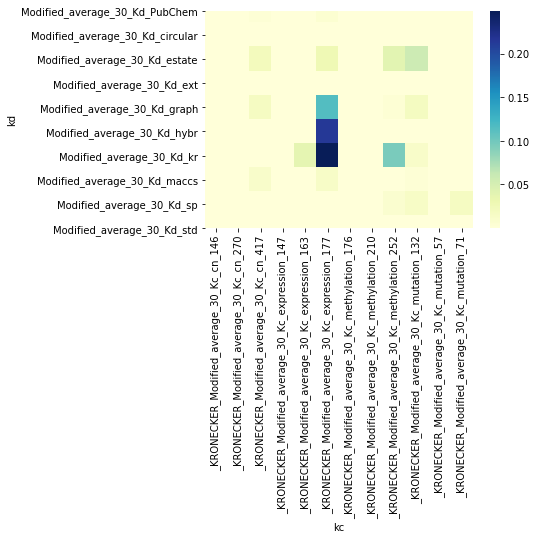

In [75]:
plot_heatmap(df, percentual=30, tipo='average')

weight_average_30 = plt.gcf()
plt.show()
weight_average_30.savefig('weight_average_30.png', format='png')

### Analysis of weights according to the combination of drug and protein files. Evaluated with: technique: average; percentage: 50.

In [72]:
def plot_heatmap(dataframe, percentual=50, tipo='average'):

    # testando com 50% e tipo=average
    pesos = dataframe[(dataframe['percentual'] == percentual) \
                    & (dataframe['tipo'] == tipo)]['pesos'].values[0]
    kernel_names = dataframe[(dataframe['percentual'] == percentual) \
                           & (dataframe['tipo'] == tipo)]['kernel_names'].values[0]
    # assumindo que kernel_names nao muda em cada execucao
    kds = [kn.split('.txt')[0] for kn in kernel_names[:-1]]
    kcs = [kn.split('.txt')[1] for kn in kernel_names[:-1]]
    pesos = dataframe[(dataframe['percentual'] == 50) \
                    & (dataframe['tipo'] == 'average')]['pesos'].values[0]

    df2 = pd.DataFrame(data={
        'kd': kds,
        'kc': kcs,
        'peso': pesos} )

    matrix = df2.groupby(['kd','kc'])['peso'].mean().unstack()

    # sns.heatmap(matrix)
    weight_average_50 = sns.heatmap(matrix, cmap="YlGnBu")

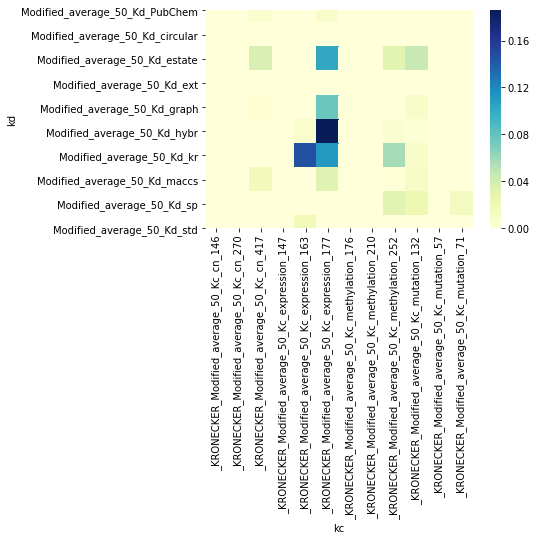

In [73]:
plot_heatmap(df, percentual=50, tipo='average')

weight_average_50 = plt.gcf()
plt.show()
weight_average_50.savefig('weight_average_50.png', format='png')

### Analysis of weights according to the combination of drug and protein files. Evaluated with: technique: average; percentage: 70.

In [70]:
def plot_heatmap(dataframe, percentual=70, tipo='average'):

    # testando com 70% e tipo=average
    pesos = dataframe[(dataframe['percentual'] == percentual) \
                    & (dataframe['tipo'] == tipo)]['pesos'].values[0]
    kernel_names = dataframe[(dataframe['percentual'] == percentual) \
                           & (dataframe['tipo'] == tipo)]['kernel_names'].values[0]
    # assumindo que kernel_names nao muda em cada execucao
    kds = [kn.split('.txt')[0] for kn in kernel_names[:-1]]
    kcs = [kn.split('.txt')[1] for kn in kernel_names[:-1]]
    pesos = dataframe[(dataframe['percentual'] == 70) \
                    & (dataframe['tipo'] == 'average')]['pesos'].values[0]

    df2 = pd.DataFrame(data={
        'kd': kds,
        'kc': kcs,
        'peso': pesos} )

    matrix = df2.groupby(['kd','kc'])['peso'].mean().unstack()

     # sns.heatmap(matrix)
    weight_average_70 = sns.heatmap(matrix, cmap="YlGnBu")

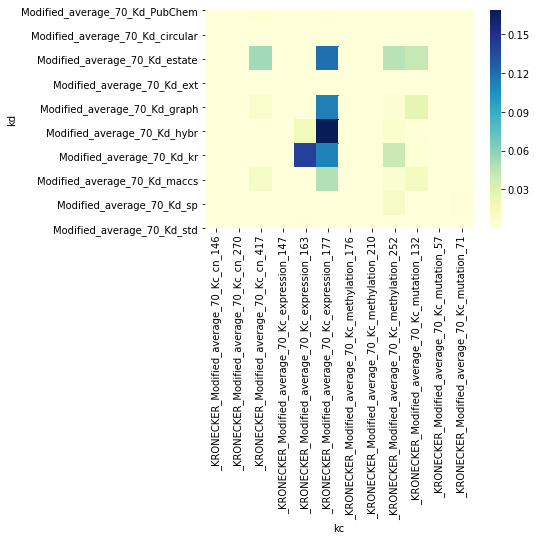

In [71]:
plot_heatmap(df, percentual=70, tipo='average')

weight_average_70 = plt.gcf()
plt.show()
weight_average_70.savefig('weight_average_70.png', format='png')

### Analysis of weights according to the combination of drug and protein files. Evaluated with: technique: median; percentage: 10.

In [68]:
def plot_heatmap(dataframe, percentual=10, tipo='median'):

    # testando com 10% e tipo=median
    pesos = dataframe[(dataframe['percentual'] == percentual) \
                    & (dataframe['tipo'] == tipo)]['pesos'].values[0]
    kernel_names = dataframe[(dataframe['percentual'] == percentual) \
                           & (dataframe['tipo'] == tipo)]['kernel_names'].values[0]
    # assumindo que kernel_names nao muda em cada execucao
    kds = [kn.split('.txt')[0] for kn in kernel_names[:-1]]
    kcs = [kn.split('.txt')[1] for kn in kernel_names[:-1]]
    pesos = dataframe[(dataframe['percentual'] == 10) \
                    & (dataframe['tipo'] == 'median')]['pesos'].values[0]

    df2 = pd.DataFrame(data={
        'kd': kds,
        'kc': kcs,
        'peso': pesos} )

    matrix = df2.groupby(['kd','kc'])['peso'].mean().unstack()

    # sns.heatmap(matrix)
    weight_median_10 = sns.heatmap(matrix, cmap="YlGnBu")

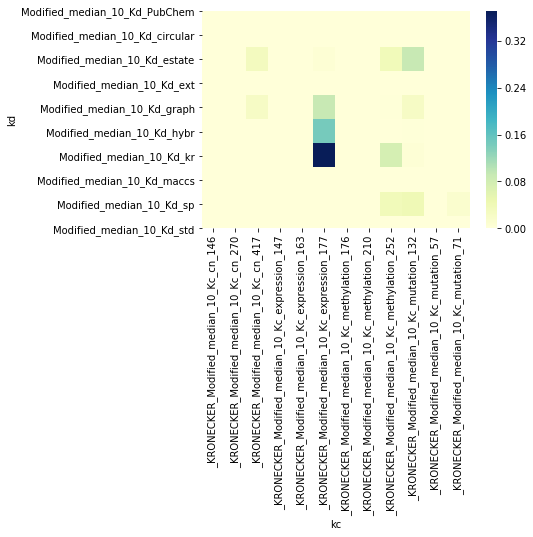

In [69]:
plot_heatmap(df, percentual=10, tipo='median')

weight_median_10 = plt.gcf()
plt.show()
weight_median_10.savefig('weight_median_10.png', format='png')

### Analysis of weights according to the combination of drug and protein files. Evaluated with: technique: median; percentage: 30.

In [66]:
def plot_heatmap(dataframe, percentual=30, tipo='median'):

    # testando com 30% e tipo=median
    pesos = dataframe[(dataframe['percentual'] == percentual) \
                    & (dataframe['tipo'] == tipo)]['pesos'].values[0]
    kernel_names = dataframe[(dataframe['percentual'] == percentual) \
                           & (dataframe['tipo'] == tipo)]['kernel_names'].values[0]
    # assumindo que kernel_names nao muda em cada execucao
    kds = [kn.split('.txt')[0] for kn in kernel_names[:-1]]
    kcs = [kn.split('.txt')[1] for kn in kernel_names[:-1]]
    pesos = dataframe[(dataframe['percentual'] == 30) \
                    & (dataframe['tipo'] == 'median')]['pesos'].values[0]

    df2 = pd.DataFrame(data={
        'kd': kds,
        'kc': kcs,
        'peso': pesos} )

    matrix = df2.groupby(['kd','kc'])['peso'].mean().unstack()

    # sns.heatmap(matrix)
    weight_median_30 = sns.heatmap(matrix, cmap="YlGnBu")

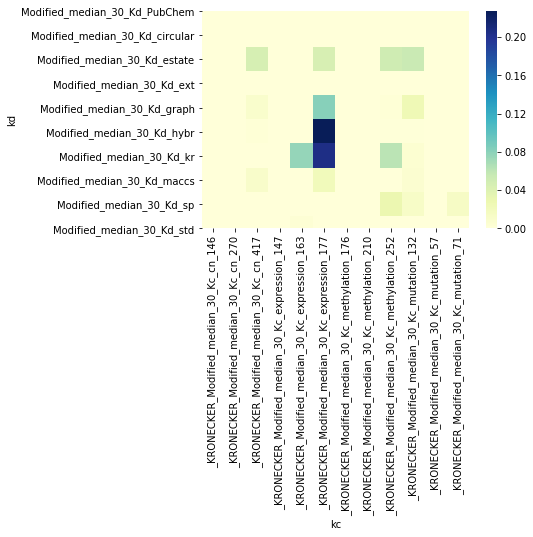

In [67]:
plot_heatmap(df, percentual=30, tipo='median')

weight_median_30 = plt.gcf()
plt.show()
weight_median_30.savefig('weight_median_30.png', format='png')

### Analysis of weights according to the combination of drug and protein files. Evaluated with: technique: median; percentage: 50.

In [64]:
def plot_heatmap(dataframe, percentual=50, tipo='median'):

    # testando com 50% e tipo=median
    pesos = dataframe[(dataframe['percentual'] == percentual) \
                    & (dataframe['tipo'] == tipo)]['pesos'].values[0]
    kernel_names = dataframe[(dataframe['percentual'] == percentual) \
                           & (dataframe['tipo'] == tipo)]['kernel_names'].values[0]
    # assumindo que kernel_names nao muda em cada execucao
    kds = [kn.split('.txt')[0] for kn in kernel_names[:-1]]
    kcs = [kn.split('.txt')[1] for kn in kernel_names[:-1]]
    pesos = dataframe[(dataframe['percentual'] == 50) \
                    & (dataframe['tipo'] == 'median')]['pesos'].values[0]

    df2 = pd.DataFrame(data={
        'kd': kds,
        'kc': kcs,
        'peso': pesos} )

    matrix = df2.groupby(['kd','kc'])['peso'].mean().unstack()

    # sns.heatmap(matrix)
    weight_median_50 = sns.heatmap(matrix, cmap="YlGnBu")

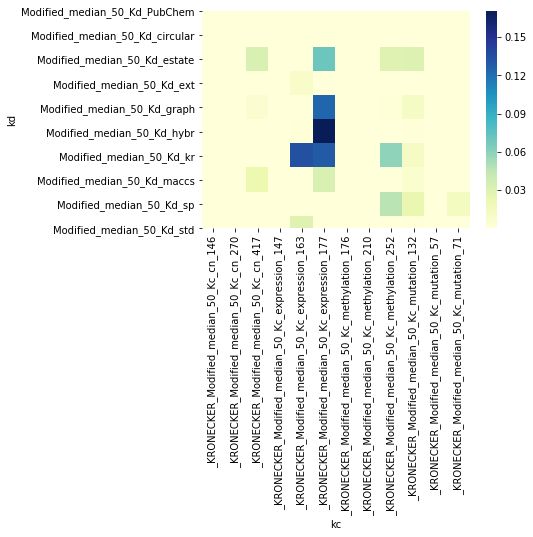

In [65]:
plot_heatmap(df, percentual=50, tipo='median')

weight_median_50 = plt.gcf()
plt.show()
weight_median_50.savefig('weight_median_50.png', format='png')

### Analysis of weights according to the combination of drug and protein files. Evaluated with: technique: median; percentage: 70.

In [62]:
def plot_heatmap(dataframe, percentual=70, tipo='median'):

    # testando com 70% e tipo=median
    pesos = dataframe[(dataframe['percentual'] == percentual) \
                    & (dataframe['tipo'] == tipo)]['pesos'].values[0]
    kernel_names = dataframe[(dataframe['percentual'] == percentual) \
                           & (dataframe['tipo'] == tipo)]['kernel_names'].values[0]
    # assumindo que kernel_names nao muda em cada execucao
    kds = [kn.split('.txt')[0] for kn in kernel_names[:-1]]
    kcs = [kn.split('.txt')[1] for kn in kernel_names[:-1]]
    pesos = dataframe[(dataframe['percentual'] == 70) \
                    & (dataframe['tipo'] == 'median')]['pesos'].values[0]

    df2 = pd.DataFrame(data={
        'kd': kds,
        'kc': kcs,
        'peso': pesos} )

    matrix = df2.groupby(['kd','kc'])['peso'].mean().unstack()

    # sns.heatmap(matrix)
    weight_median_70 = sns.heatmap(matrix, cmap="YlGnBu")

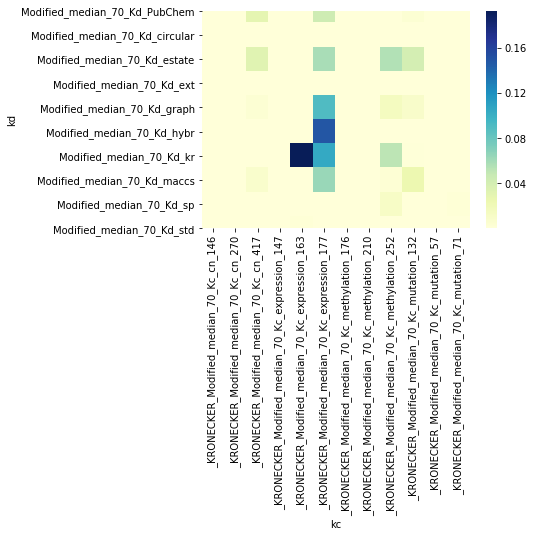

In [63]:
plot_heatmap(df, percentual=70, tipo='median')

weight_median_70 = plt.gcf()
plt.show()
weight_median_70.savefig('weight_median_70.png', format='png')

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

# figure
fig, ax = plt.subplots(figsize=(12, 10))
sb.heatmap(matrix)
# plt.show()

# plot heatmap
sb.heatmap(df2, cmap="Blues", vmin= 0.9, vmax=1.65, square=True,
           linewidth=0.3, cbar_kws={"shrink": .8})
# xticks
ax.xaxis.tick_top()
xticks_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.arange(12) + .5, labels=xticks_labels)
# axis labels
plt.xlabel('')
plt.ylabel('')
# title
title = 'monthly Average exchange rate\nValue of one USD in CAD\n'.upper()
plt.title(title, loc='left')
plt.show()

NameError: name 'matrix' is not defined

### Analysis of weights according to the combination of drug and protein files. Evaluated with: technique: median; percentage: 70.

In [46]:
import numpy as np
import pandas as pd


data = {}
data['tipo'] = []
data['percentual'] = []
data['F1'] = []
data['Pearson_Correlation'] = []
data['RMSE'] = []
data['F1_modified'] = []
data['Pearson_Correlation_modified'] = []
data['RMSE_modified'] = []


mean_f1_original = []
mean_pearsonCorrelation_original = []
mean_RMSE_original = []


f1_file = '/home/tassia/TCC code/Treatment-of-incomplete-kernels/Original/drug_response_data/F1_score.txt'
f1_original = np.loadtxt(f1_file)
mean_f1_original.append(f1_original.mean())


pearsonCorrelation_file = '/home/tassia/TCC code/Treatment-of-incomplete-kernels/Original/drug_response_data/Pearson_correlation.txt'
pearsonCorrelation_original = np.loadtxt(pearsonCorrelation_file)
mean_pearsonCorrelation_original.append(pearsonCorrelation_original.mean())


RMSE_file = '/home/tassia/TCC code/Treatment-of-incomplete-kernels/Original/drug_response_data/RMSE.txt'
RMSE_original = np.loadtxt(RMSE_file)
mean_RMSE_original.append(RMSE_original.mean())


for dir in dirs:
    # print('DIR', dir)
    mean_f1_modified = []
    mean_pearsonCorrelation_modified = []
    mean_RMSE_modified = []
    for iter in os.listdir(path+dir):
        # print('ITER', iter)
        f1_file = path+dir+'/'+iter+'/F1_score.txt'
        f1_modified = np.loadtxt(f1_file)
        mean_f1_modified.append(f1_modified.mean())

        pearsonCorrelation_file = path+dir+'/'+iter+'/Pearson_correlation.txt'
        pearsonCorrelation_modified = np.loadtxt(pearsonCorrelation_file)
        mean_pearsonCorrelation_modified.append(pearsonCorrelation_modified.mean())

        RMSE_file = path+dir+'/'+iter+'/RMSE.txt'
        RMSE_modified = np.loadtxt(RMSE_file)
        mean_RMSE_modified.append(RMSE_modified.mean())

        partes = dir.split('_')

    data['tipo'].append(partes[1])
    data['percentual'].append(int(partes[2]))
    data['F1'].append(np.mean(mean_f1_original))
    data['Pearson_Correlation'].append(np.mean(mean_pearsonCorrelation_original))
    data['RMSE'].append(np.mean(mean_RMSE_original))
    data['F1_modified'].append(np.mean(mean_f1_modified))
    data['Pearson_Correlation_modified'].append(np.mean(mean_pearsonCorrelation_modified))
    data['RMSE_modified'].append(np.mean(mean_RMSE_modified))

df_all = pd.DataFrame(data=data)
df_all

,tipo,percentual,F1,Pearson_Correlation,RMSE,F1_modified,Pearson_Correlation_modified,RMSE_modified
0,average,70,0.636589,0.837781,1.799855,0.579875,0.749258,2.305535
1,zero,10,0.636589,0.837781,1.799855,0.550972,0.715022,2.503264
2,median,70,0.636589,0.837781,1.799855,0.588694,0.764835,2.221370
3,average,30,0.636589,0.837781,1.799855,0.593713,0.769131,2.207264
4,median,10,0.636589,0.837781,1.799855,0.603812,0.790405,2.085613
5,average,10,0.636589,0.837781,1.799855,0.599449,0.781158,2.134961
6,median,30,0.636589,0.837781,1.799855,0.593312,0.769816,2.199635
7,median,50,0.636589,0.837781,1.799855,0.581394,0.757179,2.270431
8,zero,50,0.636589,0.837781,1.799855,0.499740,0.565537,3.558117
9,zero,70,0.636589,0.837781,1.799855,0.478331,0.463281,4.609841


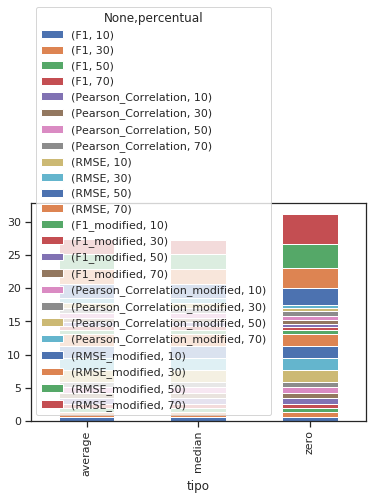

In [47]:
import matplotlib.pyplot as plt
import pandas as pd

df_all.groupby(['tipo','percentual']).mean().unstack().plot(kind='bar',stacked=True)
plt.show()

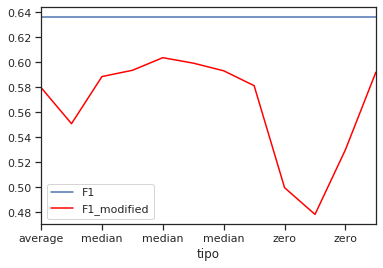

In [54]:
import matplotlib.pyplot as plt
import pandas as pd


# gca stands for 'get current axis'
ax = plt.gca()

df_all.plot(kind='line',x='tipo',y='F1',ax=ax)
df_all.plot(kind='line',x='tipo',y='F1_modified', color='red', ax=ax)

plt.show()

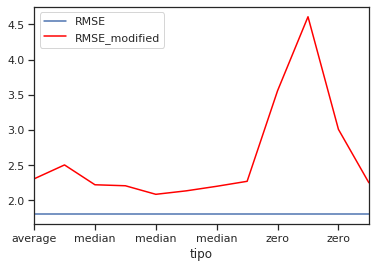

In [49]:
import matplotlib.pyplot as plt
import pandas as pd

# gca stands for 'get current axis'
ax = plt.gca()

df_all.plot(kind='line',x='tipo',y='RMSE',ax=ax)
df_all.plot(kind='line',x='tipo',y='RMSE_modified', color='red', ax=ax)

plt.show()

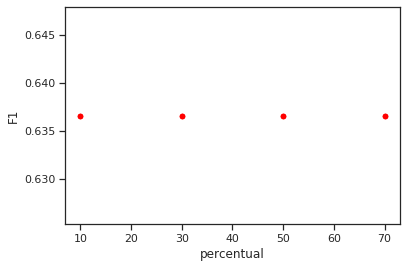

In [50]:
import matplotlib.pyplot as plt
import pandas as pd

# a scatter plot comparing num_children and num_pets
df_all.plot(kind='scatter',x='percentual',y='F1',color='red')
plt.show()


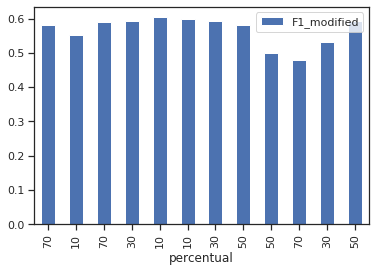

In [95]:
import matplotlib.pyplot as plt
import pandas as pd

# a simple line plot
df_all.loc[df_all.percentual == 10, :].plot(kind='bar',x='percentual',y='F1_modified')